In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from earlystop import EarlyStopper
from lstm_models import AirModel, StackLSTM, AirModel_DropOut, AirModelLayers


#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

In [2]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file7_080124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,0.134180,0.023473,0.002203,0.002203-0.001490j,0.002659,-0.594742,-0.051439
1,0.135824,0.025117,0.002051,0.002051+0.000170j,0.002058,0.082612,-0.020024
2,0.136482,0.025775,0.001900,0.001900+0.000303j,0.001924,0.158163,0.009547
3,0.137797,0.027090,0.001749,0.001749+0.000903j,0.001969,0.476669,0.035605
4,0.137797,0.027090,0.001599,0.001599+0.000993j,0.001882,0.555726,0.056848


### **data**

In [3]:
amplitudes = df['Amplitude'][300:300000].values
train, val = utils.split_data(amplitudes)
x_train, y_train = utils.create_dataset(train, 100)
x_val, y_val = utils.create_dataset(val, 100)
train_loader = utils.create_loader(x_train, y_train, 32)
val_loader = utils.create_loader(x_val, y_val, 32)

print(x_train.shape, y_train.shape ,x_val.shape, y_val.shape)

torch.Size([239660, 100, 1]) torch.Size([239660, 100, 1]) torch.Size([59840, 100, 1]) torch.Size([59840, 100, 1])


## **model**


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0, Train Loss: 0.0070512173652511525, Test Loss: 0.0022002563917048194
Epoch: 0, Loss: 0.0028870292007923126


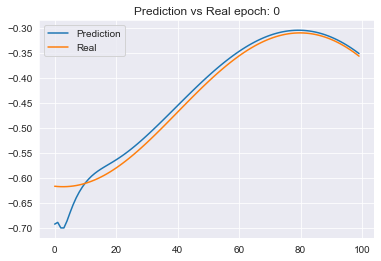

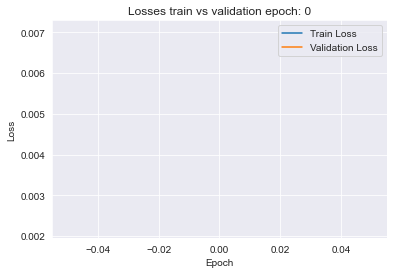

 10%|█         | 2/20 [18:50<2:47:11, 557.33s/it]

Epoch: 2, Train Loss: 0.0012111928623465907, Test Loss: 0.0010541086739743438
Epoch: 2, Loss: 0.0013749751960858703


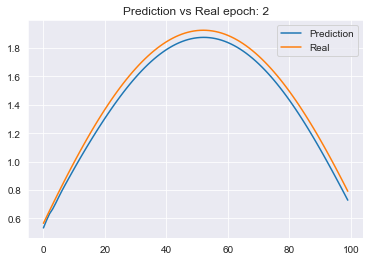

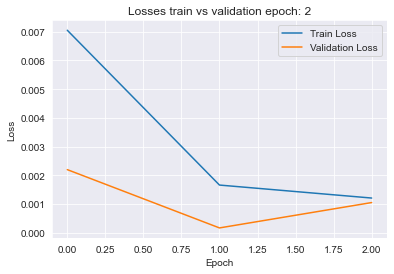

 20%|██        | 4/20 [36:50<2:26:34, 549.66s/it]

Epoch: 4, Train Loss: 0.0007918248025331154, Test Loss: 7.464185220212426e-05
Epoch: 4, Loss: 0.0005431649624370039


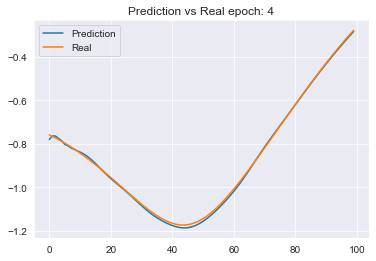

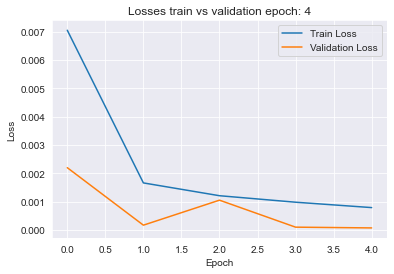

 30%|███       | 6/20 [57:17<2:16:57, 586.98s/it]

Early stopping, saving checkpoint of 5
Epoch: 6, Train Loss: 0.0005671539469012799, Test Loss: 0.0003158305252993723
Epoch: 6, Loss: 0.00031655002385377884


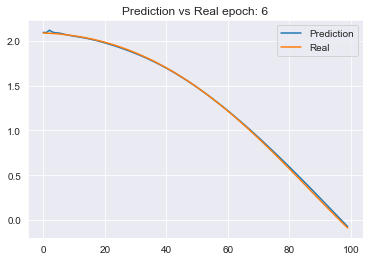

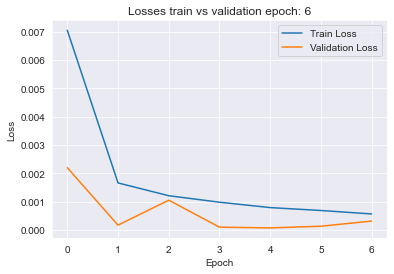

 35%|███▌      | 7/20 [1:06:37<2:05:16, 578.16s/it]

Early stopping, saving checkpoint of 6


 40%|████      | 8/20 [1:15:50<1:54:00, 570.07s/it]

Early stopping, saving checkpoint of 7
Epoch: 8, Train Loss: 0.000501659971492877, Test Loss: 0.0003489569654987993
Epoch: 8, Loss: 0.0004031442804262042


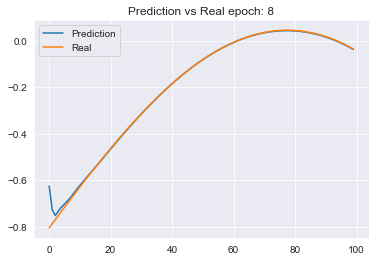

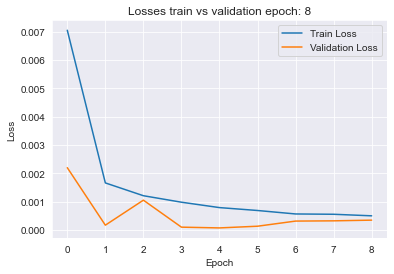

 45%|████▌     | 9/20 [1:24:47<1:42:38, 559.89s/it]

Early stopping, saving checkpoint of 8


 50%|█████     | 10/20 [1:33:31<1:31:26, 548.67s/it]

Early stopping, saving checkpoint of 9
Epoch: 10, Train Loss: 0.0004271129383410632, Test Loss: 0.0010502342308092026
Epoch: 10, Loss: 0.0001833855058066547


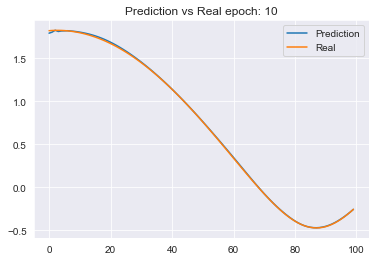

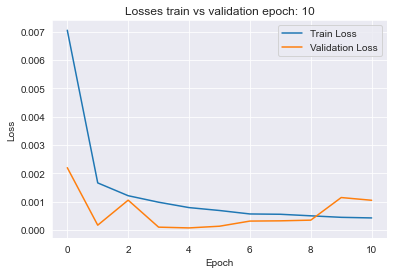

 55%|█████▌    | 11/20 [1:42:26<1:21:40, 544.46s/it]

Early stopping, saving checkpoint of 10


 60%|██████    | 12/20 [1:51:28<1:12:31, 543.93s/it]

Early stopping, saving checkpoint of 11
Epoch: 12, Train Loss: 0.0003576866480529551, Test Loss: 0.003924140021177557
Epoch: 12, Loss: 0.00032778625609353185


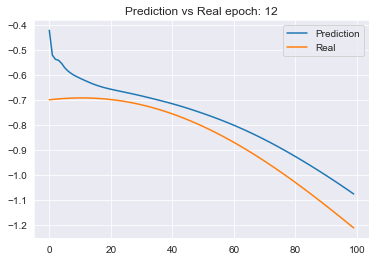

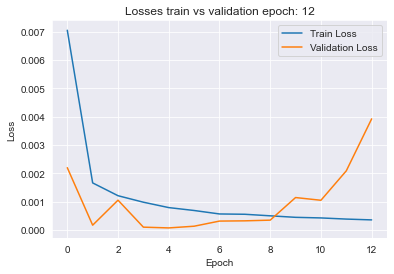

 65%|██████▌   | 13/20 [2:00:19<1:02:59, 539.97s/it]

Early stopping, saving checkpoint of 12


 70%|███████   | 14/20 [2:09:12<53:45, 537.65s/it]  

Early stopping, saving checkpoint of 13
Epoch: 14, Train Loss: 0.0003157460579101664, Test Loss: 0.023293108390494782
Epoch: 14, Loss: 0.0001360911555821076


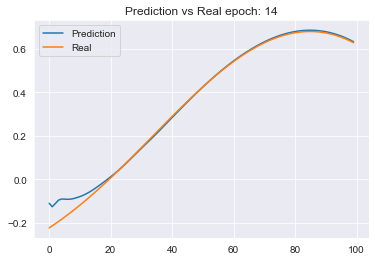

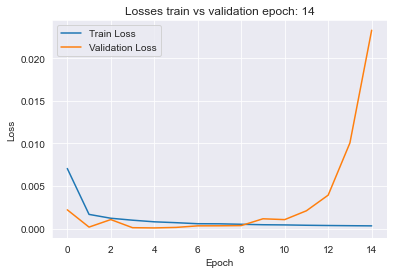

 75%|███████▌  | 15/20 [2:18:08<44:46, 537.29s/it]

Early stopping, saving checkpoint of 14


 80%|████████  | 16/20 [2:29:23<38:34, 578.62s/it]

Early stopping, saving checkpoint of 15
Epoch: 16, Train Loss: 0.0002911251887346252, Test Loss: 0.08276334550171931
Epoch: 16, Loss: 0.00014368980191648006


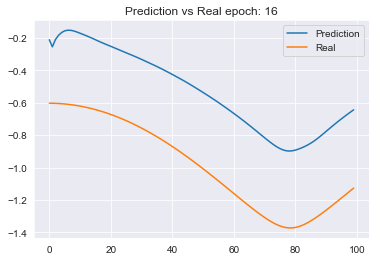

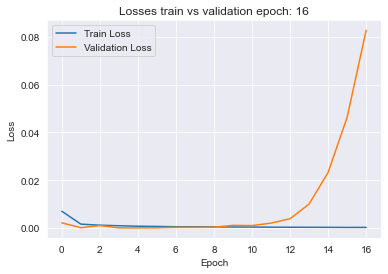

 85%|████████▌ | 17/20 [2:42:25<31:59, 639.92s/it]

Early stopping, saving checkpoint of 16


 90%|█████████ | 18/20 [2:53:03<21:18, 639.40s/it]

Early stopping, saving checkpoint of 17
Epoch: 18, Train Loss: 0.00024093914138835056, Test Loss: 0.20599655703028893
Epoch: 18, Loss: 0.00014198222197592258


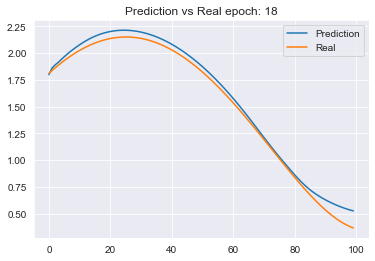

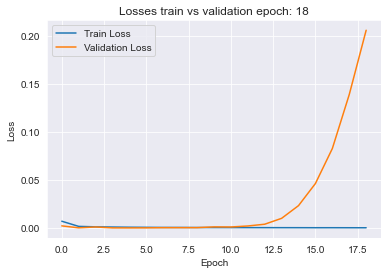

 95%|█████████▌| 19/20 [3:02:13<10:12, 612.33s/it]

Early stopping, saving checkpoint of 18


 95%|█████████▌| 19/20 [3:04:23<09:42, 582.31s/it]


Training interrupted by user


In [4]:
model = AirModelLayers(3, dropout = 0.3)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
n_epochs = 20
ncheckpoint = 2

m, av_train, av_val = utils.train_model(model, optimizer, criterion, train_loader, val_loader, n_epochs, ncheckpoint)

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(av_train)), y=av_train, mode='lines', name='av_train'))
fig.add_trace(go.Scatter(x=np.arange(len(av_val)), y=av_val, mode='lines', name='av_val'))
fig.show()


In [6]:
np.argmin(av_train), np.argmin(av_val)

(18, 4)

## **testing**

In [7]:
fname = "file1_050124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,2.256644,0.049758,0.007786,0.007786-0.004629j,0.009058,-0.536394,-0.056599
1,2.258288,0.051402,0.007361,0.007361+0.000726j,0.007397,0.098350,-0.028915
2,2.260261,0.053375,0.006933,0.006933+0.001102j,0.007020,0.157607,-0.002832
3,2.260918,0.054033,0.006502,0.006502+0.003041j,0.007178,0.437517,0.020193
4,2.262233,0.055348,0.006068,0.006068+0.003316j,0.006915,0.500092,0.039028


In [8]:
amplitudes = df['Amplitude'][300:30000].values

train, val = utils.split_data(amplitudes)
val, test = utils.split_data(val, 0.5)

x_train, y_train = utils.create_dataset(train, 100)
x_val, y_val = utils.create_dataset(val, 100)
x_test, y_test = utils.create_dataset(test, 100)

train_loader = utils.create_loader(x_train, y_train, 32)
val_loader = utils.create_loader(x_val, y_val, 32)
test_loader = utils.create_loader(x_test, y_test, 32)

print(train_loader.dataset.tensors[0].shape, val_loader.dataset.tensors[0].shape, test_loader.dataset.tensors[0].shape)

torch.Size([23660, 100, 1]) torch.Size([2870, 100, 1]) torch.Size([2870, 100, 1])


In [9]:
model_trained = AirModelLayers(n_layers=3, dropout = 0.25)
optimizer_trained = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [10]:
#cargo modelo
utils.resume(model_trained, optimizer_trained, 'earlystop_5.pth')

In [11]:
x = utils.predictions(model_trained, val_loader)

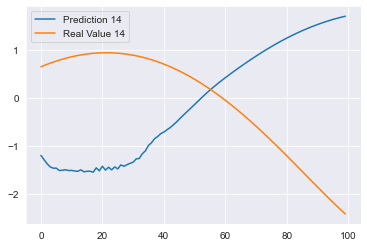

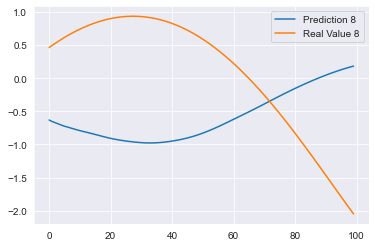

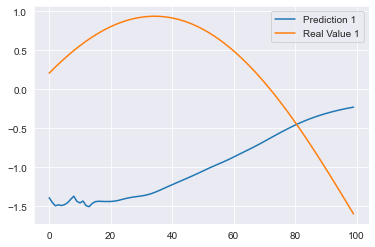

In [12]:
#x = utils.predictions(model_trained, val_loader) 
#Select 3 random indices
random_indices = np.random.choice(len(x), size=3, replace=False)

# Plot the selected predictions and real values
for i in random_indices:
    plt.figure()  # Create a new figure for each iteration
    plt.plot(np.arange(len(x[i])), x[i], label=f'Prediction {i}')
    plt.plot(np.arange(len(y_test[i])), y_test[i], label=f'Real Value {i}')
    plt.legend()
    plt.show()


## **second training**



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Train Loss: 0.0009486990351925251, Test Loss: 0.010179704075886144
Epoch: 0, Loss: 0.00048074498772621155


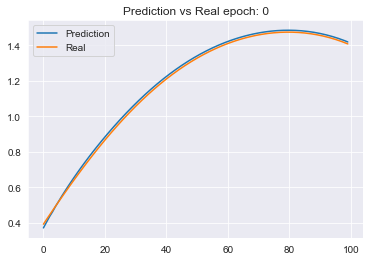

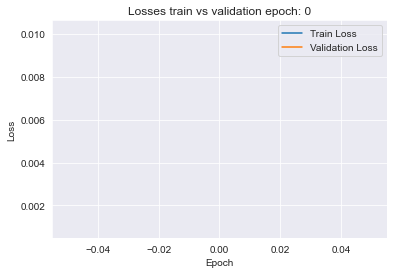

  6%|▌         | 3/50 [03:07<48:13, 61.57s/it]

Epoch: 3, Train Loss: 0.0009460696866389716, Test Loss: 0.010212313232477755
Epoch: 3, Loss: 0.0007037752075120807


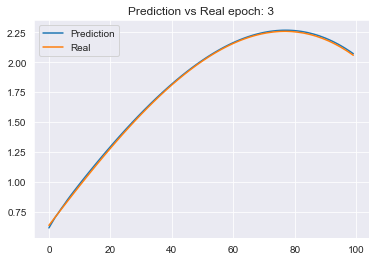

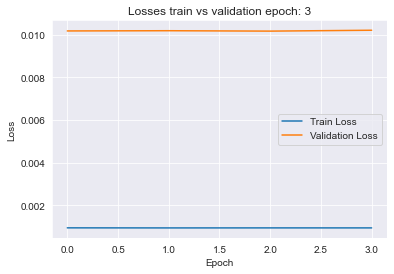

 10%|█         | 5/50 [05:01<43:59, 58.65s/it]

Early stopping, saving checkpoint of 4


 12%|█▏        | 6/50 [06:00<43:03, 58.71s/it]

Early stopping, saving checkpoint of 5
Epoch: 6, Train Loss: 0.0009489818138693384, Test Loss: 0.010186673991847783
Epoch: 6, Loss: 0.0003405011084396392


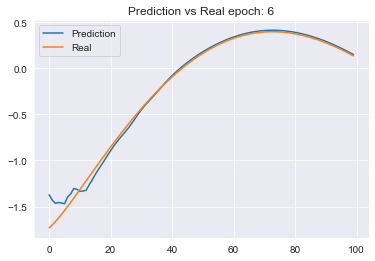

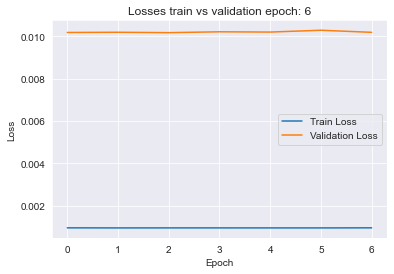

 14%|█▍        | 7/50 [07:03<43:03, 60.08s/it]

Early stopping, saving checkpoint of 6


 16%|█▌        | 8/50 [08:00<41:27, 59.23s/it]

Early stopping, saving checkpoint of 7


 18%|█▊        | 9/50 [08:57<40:01, 58.58s/it]

Early stopping, saving checkpoint of 8
Epoch: 9, Train Loss: 0.0009515684213240731, Test Loss: 0.010215336459481882
Epoch: 9, Loss: 0.00027941566077061


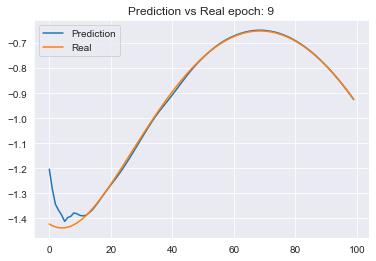

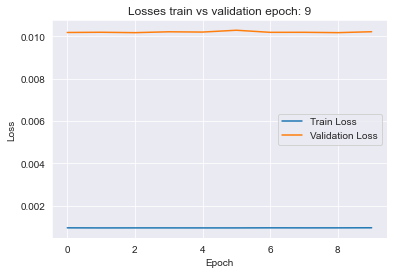

 20%|██        | 10/50 [09:57<39:18, 58.96s/it]

Early stopping, saving checkpoint of 9


 22%|██▏       | 11/50 [10:53<37:47, 58.15s/it]

Early stopping, saving checkpoint of 10


 24%|██▍       | 12/50 [11:50<36:29, 57.63s/it]

Early stopping, saving checkpoint of 11
Epoch: 12, Train Loss: 0.0009464621559222783, Test Loss: 0.010189454733497567
Epoch: 12, Loss: 0.0008644812041893601


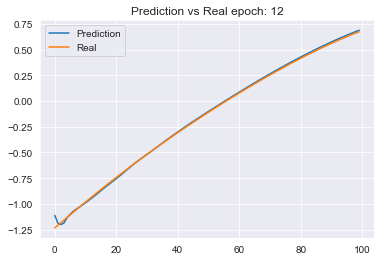

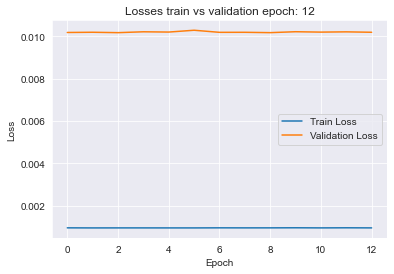

 26%|██▌       | 13/50 [12:48<35:36, 57.73s/it]

Early stopping, saving checkpoint of 12


 28%|██▊       | 14/50 [13:46<34:42, 57.85s/it]

Early stopping, saving checkpoint of 13


 30%|███       | 15/50 [14:44<33:42, 57.78s/it]

Early stopping, saving checkpoint of 14
Epoch: 15, Train Loss: 0.0009457926256456286, Test Loss: 0.010221027062895398
Epoch: 15, Loss: 0.00043865758925676346


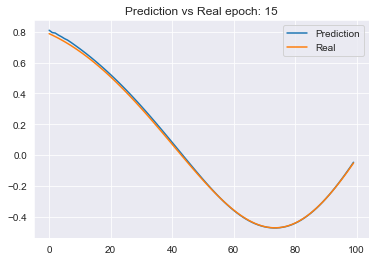

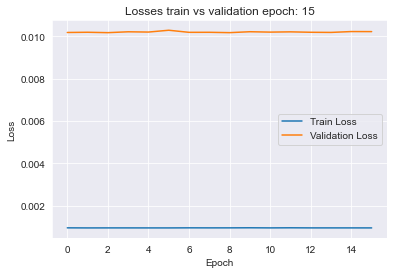

 32%|███▏      | 16/50 [15:41<32:42, 57.73s/it]

Early stopping, saving checkpoint of 15


 34%|███▍      | 17/50 [16:39<31:46, 57.76s/it]

Early stopping, saving checkpoint of 16


 36%|███▌      | 18/50 [17:36<30:38, 57.45s/it]

Early stopping, saving checkpoint of 17
Epoch: 18, Train Loss: 0.0009503576676030895, Test Loss: 0.010180924193830126
Epoch: 18, Loss: 0.001974854152649641


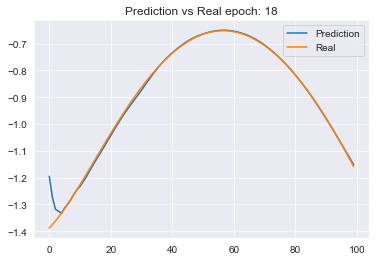

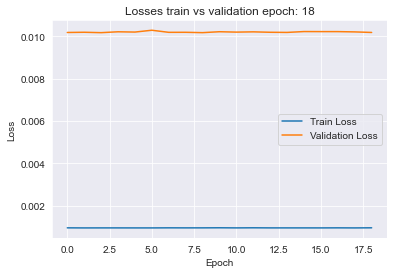

 38%|███▊      | 19/50 [18:33<29:43, 57.52s/it]

Early stopping, saving checkpoint of 18


 40%|████      | 20/50 [19:29<28:26, 56.88s/it]

Early stopping, saving checkpoint of 19


 42%|████▏     | 21/50 [20:31<28:17, 58.53s/it]

Early stopping, saving checkpoint of 20
Epoch: 21, Train Loss: 0.0009476623642635909, Test Loss: 0.0102220743881642
Epoch: 21, Loss: 0.0005386383272707462


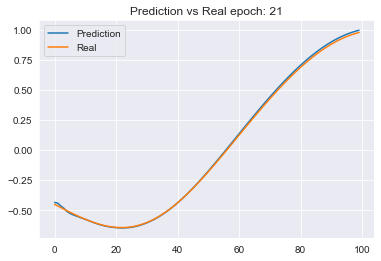

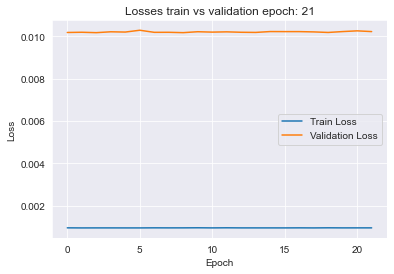

 44%|████▍     | 22/50 [21:35<28:00, 60.00s/it]

Early stopping, saving checkpoint of 21


 46%|████▌     | 23/50 [22:30<26:25, 58.73s/it]

Early stopping, saving checkpoint of 22


 48%|████▊     | 24/50 [23:26<24:59, 57.67s/it]

Early stopping, saving checkpoint of 23
Epoch: 24, Train Loss: 0.0009488882374244969, Test Loss: 0.010220908254591956
Epoch: 24, Loss: 0.0018048628699034452


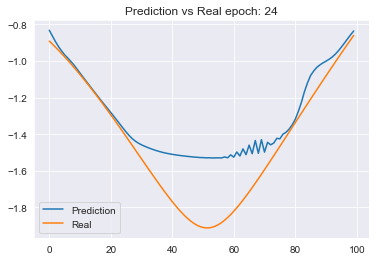

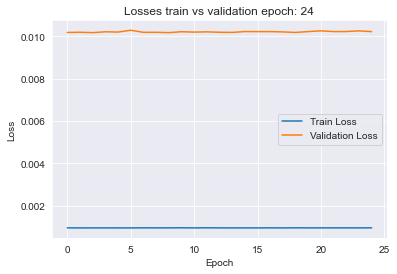

 50%|█████     | 25/50 [24:21<23:48, 57.15s/it]

Early stopping, saving checkpoint of 24


 52%|█████▏    | 26/50 [25:18<22:43, 56.83s/it]

Early stopping, saving checkpoint of 25


 54%|█████▍    | 27/50 [26:13<21:40, 56.55s/it]

Early stopping, saving checkpoint of 26
Epoch: 27, Train Loss: 0.0009461151256235442, Test Loss: 0.010171580001284989
Epoch: 27, Loss: 0.0024226263631135225


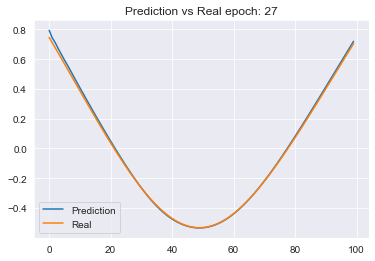

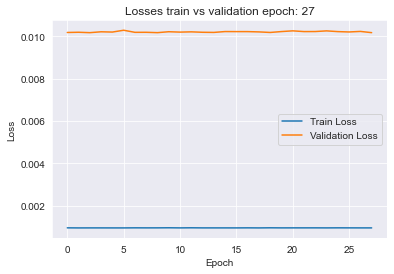

 56%|█████▌    | 28/50 [27:11<20:49, 56.81s/it]

Early stopping, saving checkpoint of 27


 58%|█████▊    | 29/50 [28:06<19:45, 56.43s/it]

Early stopping, saving checkpoint of 28


 60%|██████    | 30/50 [29:04<18:53, 56.70s/it]

Early stopping, saving checkpoint of 29
Epoch: 30, Train Loss: 0.0009478475334715866, Test Loss: 0.010233582773556313
Epoch: 30, Loss: 0.0006400438724085689


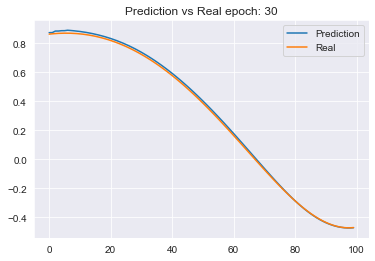

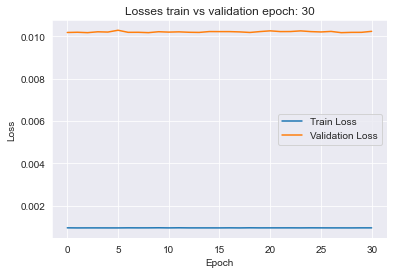

 62%|██████▏   | 31/50 [30:00<17:56, 56.68s/it]

Early stopping, saving checkpoint of 30


 64%|██████▍   | 32/50 [30:55<16:49, 56.10s/it]

Early stopping, saving checkpoint of 31


 66%|██████▌   | 33/50 [31:55<16:13, 57.25s/it]

Early stopping, saving checkpoint of 32
Epoch: 33, Train Loss: 0.000945260059528959, Test Loss: 0.010198460013553914
Epoch: 33, Loss: 0.0006655362667515874


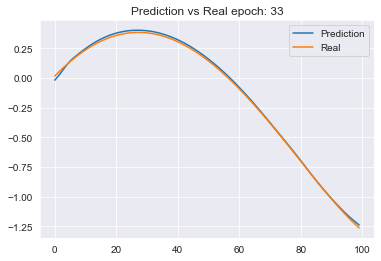

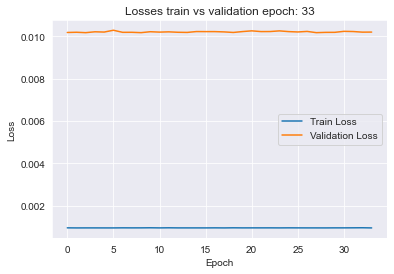

 68%|██████▊   | 34/50 [32:54<15:23, 57.72s/it]

Early stopping, saving checkpoint of 33


 70%|███████   | 35/50 [33:50<14:17, 57.19s/it]

Early stopping, saving checkpoint of 34


 72%|███████▏  | 36/50 [34:45<13:13, 56.66s/it]

Early stopping, saving checkpoint of 35
Epoch: 36, Train Loss: 0.0009462745043738569, Test Loss: 0.010189941535807318
Epoch: 36, Loss: 0.0008909471798688173


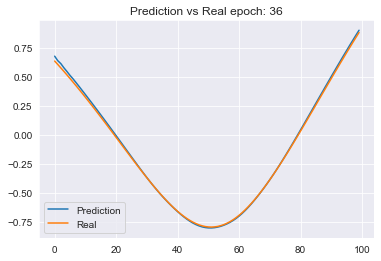

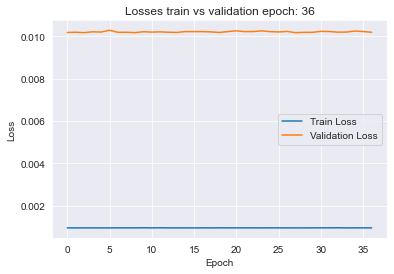

 74%|███████▍  | 37/50 [35:41<12:12, 56.34s/it]

Early stopping, saving checkpoint of 36


 76%|███████▌  | 38/50 [36:38<11:18, 56.58s/it]

Early stopping, saving checkpoint of 37


 78%|███████▊  | 39/50 [37:34<10:19, 56.32s/it]

Early stopping, saving checkpoint of 38
Epoch: 39, Train Loss: 0.0009474385173037976, Test Loss: 0.010195667384606269
Epoch: 39, Loss: 0.0008758447365835309


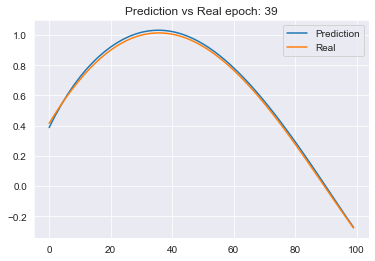

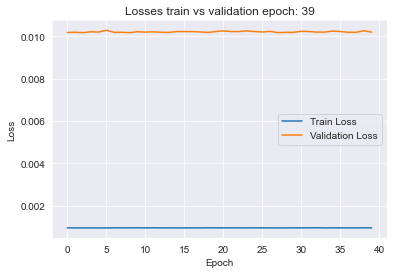

 80%|████████  | 40/50 [38:29<09:21, 56.16s/it]

Early stopping, saving checkpoint of 39


 82%|████████▏ | 41/50 [39:26<08:27, 56.39s/it]

Early stopping, saving checkpoint of 40


 84%|████████▍ | 42/50 [40:25<07:37, 57.13s/it]

Early stopping, saving checkpoint of 41
Epoch: 42, Train Loss: 0.0009447208621045197, Test Loss: 0.010185100497781402
Epoch: 42, Loss: 0.0005131333018653095


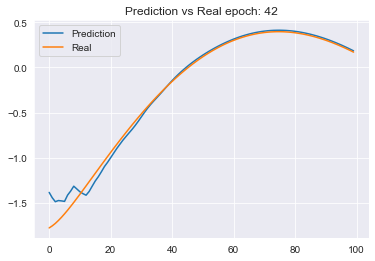

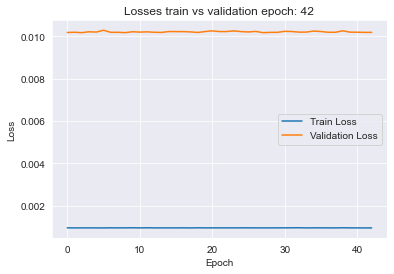

 86%|████████▌ | 43/50 [41:29<06:53, 59.08s/it]

Early stopping, saving checkpoint of 42


 88%|████████▊ | 44/50 [42:33<06:02, 60.50s/it]

Early stopping, saving checkpoint of 43


 90%|█████████ | 45/50 [43:31<04:58, 59.74s/it]

Early stopping, saving checkpoint of 44
Epoch: 45, Train Loss: 0.0009532114217133337, Test Loss: 0.01023044069038911
Epoch: 45, Loss: 0.0015511080855503678


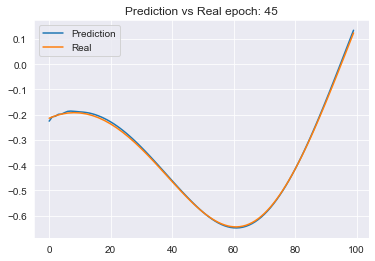

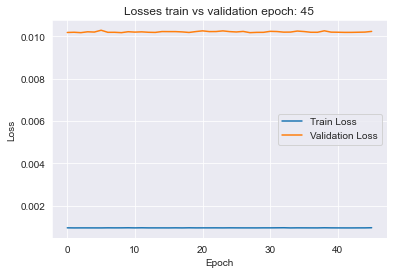

 92%|█████████▏| 46/50 [44:38<04:07, 61.91s/it]

Early stopping, saving checkpoint of 45


 94%|█████████▍| 47/50 [45:33<03:00, 60.08s/it]

Early stopping, saving checkpoint of 46


 96%|█████████▌| 48/50 [46:28<01:56, 58.45s/it]

Early stopping, saving checkpoint of 47
Epoch: 48, Train Loss: 0.0009495728251774406, Test Loss: 0.010211913414402968
Epoch: 48, Loss: 0.000532803765963763


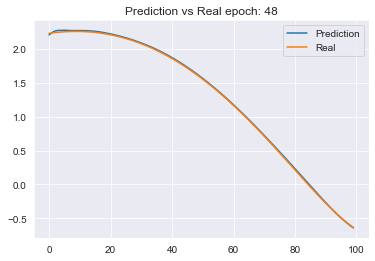

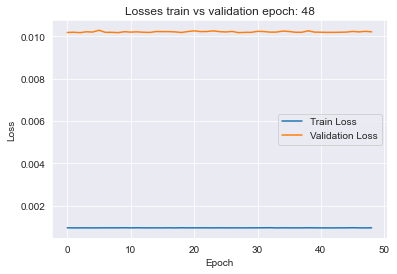

 98%|█████████▊| 49/50 [47:24<00:57, 57.74s/it]

Early stopping, saving checkpoint of 48


100%|██████████| 50/50 [48:20<00:00, 58.00s/it]

Early stopping, saving checkpoint of 49


In [13]:
n_epochs = 50
ncheckpoint = 3

m2, av_train, av_val = utils.train_model(model_trained, optimizer_trained, criterion, train_loader, val_loader, n_epochs, ncheckpoint)

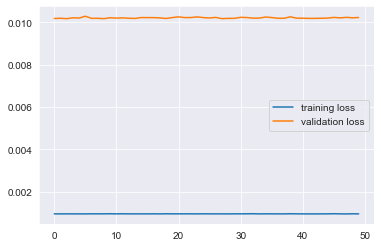

In [14]:
plt.plot(av_train, label='training loss')
plt.plot(av_val, label='validation loss')
plt.legend()
plt.show()

## **load and test model**

In [15]:
model_trained2 = AirModelLayers(n_layers=3, dropout = 0.25)
optimizer_trained2 = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

#cargo modelo
utils.resume(model_trained2, optimizer_trained2, 'earlystop_4.pth')

In [16]:
x = utils.predictions(model_trained2, test_loader)

In [18]:
random_indices = np.random.choice(len(x), size=3, replace=False)
random_indices

array([ 7, 11, 18])

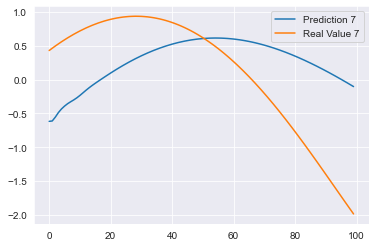

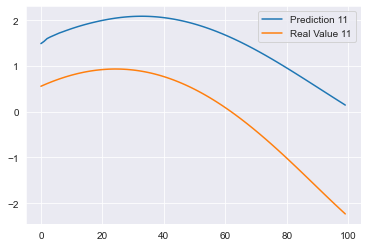

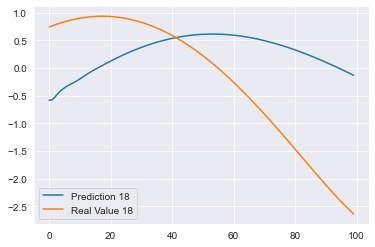

In [22]:
# Plot the selected predictions and real values
for i in random_indices:
    plt.figure()  # Create a new figure for each iteration
    plt.plot(np.arange(len(x[i])), x[i], label=f'Prediction {i}')
    plt.plot(np.arange(len(y_test[i])), y_test[i], label=f'Real Value {i}')
    plt.legend()
    plt.show()